<a href="https://colab.research.google.com/github/AkashCreator/mydata/blob/main/Pandas_MillenniumMovieDataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Read the Movie dat file data
import pandas as pd
movies_data=pd.read_csv('./MovieData/movies.dat',sep='::', encoding = 'unicode_escape',engine='python',header=None)
movies_data.columns=['movie_id','movie_details','Genre']
movies_data_without_split=movies_data
movies_data.head(10)

,movie_id,movie_details,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
#Check for nulls
movies_data.isnull().sum()

movie_id         0
movie_details    0
Genre            0
dtype: int64

In [ ]:
#Format the data so that we can analyse all categories and year wise data
movie_split_data=movies_data['movie_details'].str.split(' \(',n=1,expand=True)
movies_data['movie_name']=movie_split_data[0]
movies_data['release_year']=movie_split_data[1].str.replace('\)','')

<ipython-input-4-1c688ada10ab>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_data['release_year']=movie_split_data[1].str.replace('\)','')


In [ ]:
# Drop the original field which is no more required
movies_data.drop(columns=['movie_details'],inplace=True)

In [ ]:
#Format the Genre Dat
movies_data['Genre']=movies_data['Genre'].str.split('|')
movies_data=movies_data.explode('Genre',ignore_index=True)


In [ ]:
#show the modified data after transformations
movies_data.head(30)

,movie_id,Genre,movie_name,release_year
0,1,Animation,Toy Story,1995
1,1,Children's,Toy Story,1995
2,1,Comedy,Toy Story,1995
3,2,Adventure,Jumanji,1995
4,2,Children's,Jumanji,1995
5,2,Fantasy,Jumanji,1995
6,3,Comedy,Grumpier Old Men,1995
7,3,Romance,Grumpier Old Men,1995
8,4,Comedy,Waiting to Exhale,1995
9,4,Drama,Waiting to Exhale,1995


In [ ]:
#Check the data types of all columns
movies_data.dtypes

movie_id         int64
Genre           object
movie_name      object
release_year    object
dtype: object

In [ ]:
ratings_data=pd.read_csv('./MovieData/ratings.dat',sep='::',header=None,engine='python')
ratings_data.head(5)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings_data.columns=['user_id','movie_id','rating','timestamp']

In [ ]:
ratings_data.head(10)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [ ]:
#check the data types
ratings_data.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [ ]:
#typecast timestamp from int to timestammp format
import datetime
ratings_data['timestamp']=ratings_data.timestamp.astype('datetime64[ms]')

In [ ]:
#display sameple data
ratings_data.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,1970-01-12 07:45:00.760
1,1,661,3,1970-01-12 07:45:02.109
2,1,914,3,1970-01-12 07:45:01.968
3,1,3408,4,1970-01-12 07:45:00.275
4,1,2355,5,1970-01-12 07:53:44.291


In [ ]:
#Read the data of users_data
users_data=pd.read_csv('./MovieData/users.dat',sep='::',header=None,engine='python')
users_data.columns=['user_id','gender','age','occupation','Zip_code']
users_data

,user_id,gender,age,occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
# Join the data
users_data_rating_five=movies_data_without_split.merge(ratings_data,how='inner',
                                         on='movie_id')
users_data_rating_five=users_data_rating_five[users_data_rating_five['rating']==5]
users_data_rating_five.reset_index()

,index,movie_id,Genre,movie_name,release_year,user_id,rating,timestamp
0,0,1,"[Animation, Children's, Comedy]",Toy Story,1995,1,5,1970-01-12 07:53:44.268
1,3,1,"[Animation, Children's, Comedy]",Toy Story,1995,9,5,1970-01-12 07:43:45.952
2,4,1,"[Animation, Children's, Comedy]",Toy Story,1995,10,5,1970-01-12 07:43:46.474
3,6,1,"[Animation, Children's, Comedy]",Toy Story,1995,19,5,1970-01-12 07:49:15.994
4,11,1,"[Animation, Children's, Comedy]",Toy Story,1995,34,5,1970-01-12 07:41:42.970
...,...,...,...,...,...,...,...,...
226305,1000173,3952,"[Drama, Thriller]","Contender, The",2000,4448,5,1970-01-12 09:33:22.874
226306,1000182,3952,"[Drama, Thriller]","Contender, The",2000,4682,5,1970-01-12 13:22:15.231
226307,1000185,3952,"[Drama, Thriller]","Contender, The",2000,4802,5,1970-01-12 10:31:25.919
226308,1000199,3952,"[Drama, Thriller]","Contender, The",2000,5359,5,1970-01-12 05:51:41.252


In [ ]:
# Group the data
top_movies_total_count=users_data_rating_five.groupby(['movie_id','movie_name']).\
count().sort_values('rating',ascending=False).\
filter(['movie_id','movie_name','rating']).reset_index()
top_movies_total_count=top_movies_total_count.head(10)
top_movies_total_count.sort_values('rating',ascending=True,inplace=True)

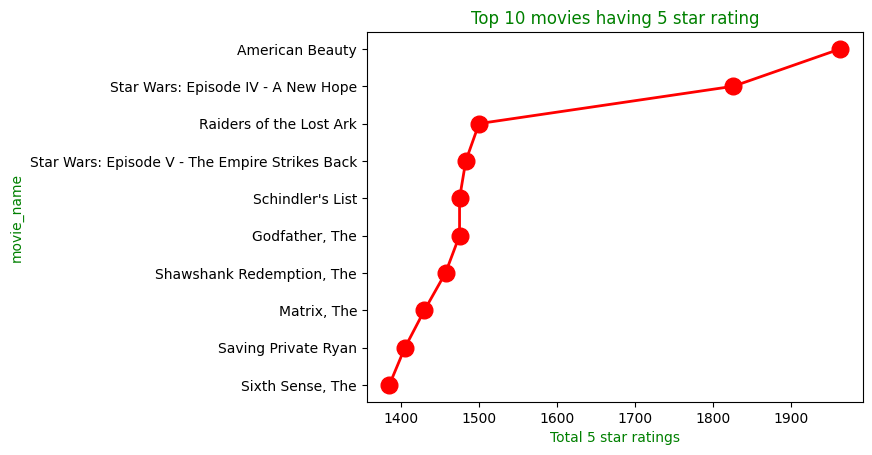

In [ ]:
# Plot the data
import matplotlib.pyplot as plt
y=top_movies_total_count['movie_name']
x=top_movies_total_count['rating']

plt.plot(x, y,color='red',marker='o',linestyle='solid',
linewidth=2, markersize=12)
title=plt.title('Top 10 movies having 5 star rating')
title.set_color('green')
label=plt.ylabel('movie_name')
label.set_color('green')
label=plt.xlabel('Total 5 star ratings')
label.set_color('green')
plt.show()